In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [9]:
df=pd.read_csv("ToyotaCorolla - MLR.csv")
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [10]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


No nulls! and everything looks good, so that we can move further.

Exploratory data analysis

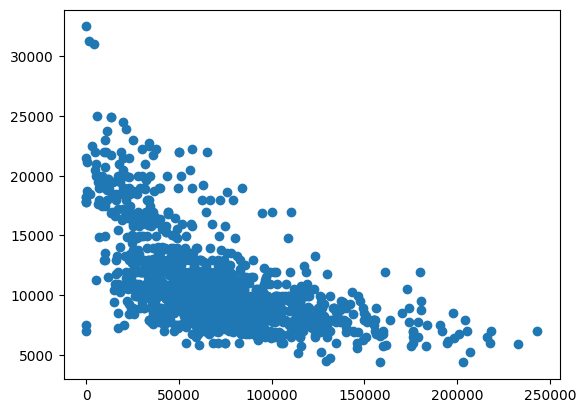

In [12]:
plt.scatter(x='KM',y='Price',data=df)

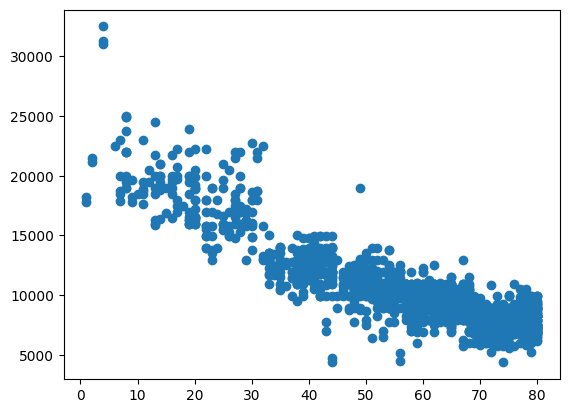

In [13]:
plt.scatter(y='Price',x='Age_08_04',data=df)

(array([110., 706., 343., 114.,  75.,  59.,  22.,   4.,   0.,   3.]),
 array([ 4350.,  7165.,  9980., 12795., 15610., 18425., 21240., 24055.,
        26870., 29685., 32500.]),
 <BarContainer object of 10 artists>)

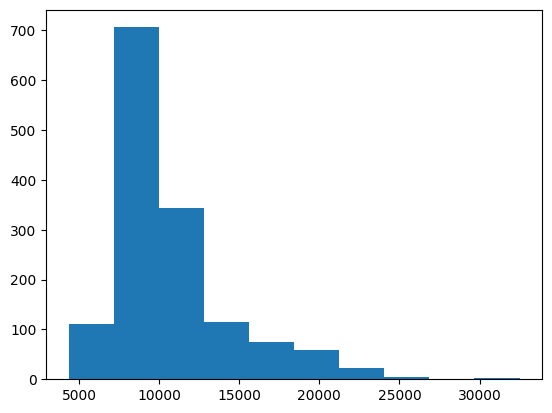

In [14]:
plt.hist(x='Price',data=df)

<Axes: xlabel='Fuel_Type'>

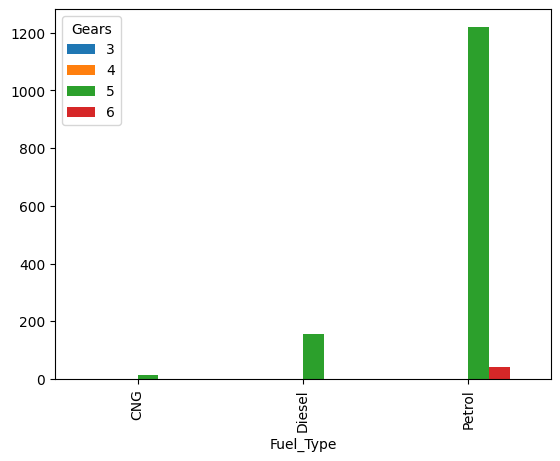

In [15]:
pd.crosstab(df.Fuel_Type,df.Gears).plot(kind='bar')

<Axes: xlabel='Automatic'>

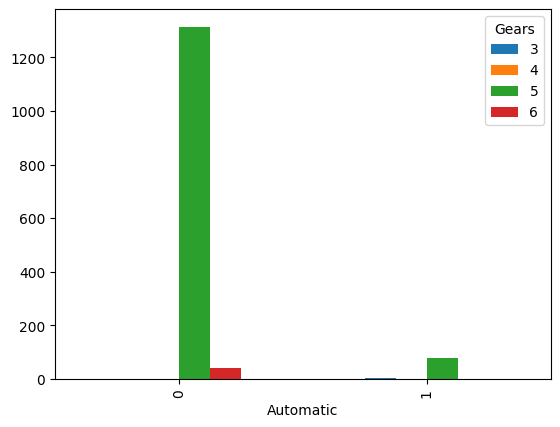

In [16]:
pd.crosstab(df.Automatic,df.Gears).plot(kind='bar')

(array([ 155.,    0.,    0.,    0.,    0., 1264.,    0.,    0.,    0.,
          17.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

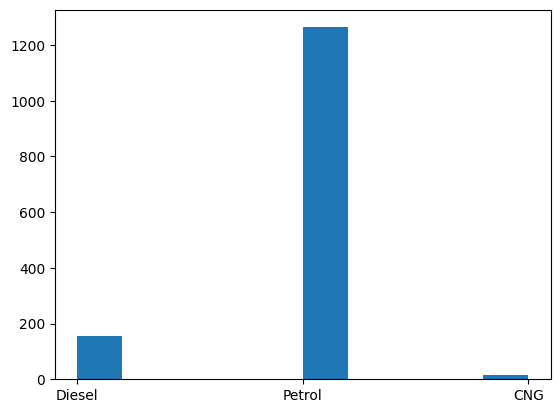

In [17]:
plt.hist(x='Fuel_Type',data=df)

In [18]:
from sklearn import preprocessing
encoder=preprocessing.LabelEncoder()
df['Fuel_Type']=encoder.fit_transform(df['Fuel_Type'])

In [19]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,4,5,1165
1,13750,23,72937,1,90,0,2000,3,4,5,1165
2,13950,24,41711,1,90,0,2000,3,4,5,1165
3,14950,26,48000,1,90,0,2000,3,4,5,1165
4,13750,30,38500,1,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,2,86,0,1300,3,4,5,1025
1432,10845,72,19000,2,86,0,1300,3,4,5,1015
1433,8500,71,17016,2,86,0,1300,3,4,5,1015
1434,7250,70,16916,2,86,0,1300,3,4,5,1015


splitting data for training and tessting

In [20]:
from sklearn.model_selection import train_test_split
y=df.Price
x=df.drop('Price',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

Building models

In [21]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
pred_values_lr=model.predict(x_test)
pred_values_lr

array([18656.07680732, 11570.12021553,  6688.32640962,  9812.05033991,
       10811.07562134,  8100.17950825, 10924.67287717, 16086.45784723,
       10115.24847614,  8846.980642  ,  7996.45107108, 10846.79377548,
       13850.65229841,  7801.99320931, 17152.83762802, 10754.33103904,
        7548.85876031,  9655.63565069,  7809.84098772, 10169.55104402,
        8570.3816859 , 11776.57405047, 13980.16709024, 13246.17658653,
        8115.92332122, 13263.07676725,  7804.50215833, 18213.91956594,
       10421.16635274,  6354.33022872,  9880.57952103, 22195.47766646,
        8310.22223403,  8183.88735567,  6930.69935232, 10665.51320464,
        6462.10401691,  8423.77043521,  7894.56208573, 11326.24588074,
       10281.20415968, 13215.66169955,  9261.8445878 , 10575.58007394,
        9191.5507209 , 17814.78550821, 10800.28321041, 14853.82056553,
        9570.07560768,  9882.45840908,  6979.72142252,  9152.80058238,
        8628.36627865, 10170.17548446, 11405.63424776, 12472.8907093 ,
      

Model Evaluation

In [22]:
# r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
r2_score_lr=r2_score(y_test, pred_values_lr)
# mean squared error
mae=mean_absolute_error(y_test,pred_values_lr)
print(f"accuracy={r2_score_lr}")
print(f"mean absolute error={mae}")

accuracy=0.8784618510273963
mean absolute error=984.1600784626753


In [23]:
from sklearn.tree import DecisionTreeRegressor
reg_model=DecisionTreeRegressor(max_depth=8)
reg_model.fit(x_train,y_train)
pred_values_dt=reg_model.predict(x_test)
pred_values_dt

array([21500.        , 11452.85714286,  7404.65517241,  9216.4787234 ,
       10323.42105263,  8023.38016529, 10612.81081081, 17250.        ,
        9216.4787234 ,  8785.71428571,  8615.38461538,  9839.79166667,
       13085.66666667,  8023.38016529, 15500.        , 11452.85714286,
        7630.81081081,  9417.85714286, 10950.        , 10179.5       ,
        8785.71428571, 11019.23076923, 12524.32098765, 13085.66666667,
        8023.38016529, 12524.32098765,  8023.38016529, 20244.44444444,
       10031.25      ,  7404.65517241,  9839.79166667, 24990.        ,
        8615.38461538,  9995.        ,  8023.38016529, 10323.42105263,
        6600.        ,  7950.        ,  8532.14285714, 11226.37096774,
       11226.37096774, 12524.32098765,  9495.        , 11226.37096774,
        8615.38461538, 17591.5       , 10323.42105263, 13085.66666667,
        9216.4787234 ,  8780.        ,  8390.        ,  9417.85714286,
        9135.71428571, 11950.        , 10612.81081081, 12524.32098765,
      

In [24]:
# r2_score
r2_score_dt=r2_score(y_test, pred_values_dt)
# mean squared error
mae_dt=mean_absolute_error(y_test,pred_values_dt)
print(f"accuracy={r2_score_dt}")
print(f"mean absolute error={mae_dt}")

accuracy=0.8854005410936965
mean absolute error=870.4245196498513


In [25]:
from sklearn.ensemble import RandomForestRegressor
model_rfr=RandomForestRegressor(max_depth=7)
model_rfr.fit(x_train,y_train)
pred_values_rfr=model_rfr.predict(x_test)
pred_values_rfr

array([20443.11638745, 11490.94962463,  7469.11583426,  9302.91148033,
       10402.2111582 ,  8159.23136951, 10490.43618974, 17317.44717673,
        9423.02822906,  8612.56784532,  8255.87806169,  9912.81130842,
       12864.40133091,  8167.3919015 , 17877.26311079, 10661.8867532 ,
        7653.20958647, 10202.04778373,  8306.30101243, 10089.82114581,
        8170.39444292, 11380.3730753 , 12760.37896633, 12525.68830767,
        7931.6228075 , 12655.64468722,  7951.19388802, 20181.16172981,
        9107.6961342 ,  7613.52462873,  9796.33283398, 23481.73333333,
        8296.21172059,  9128.33806716,  7631.61989142, 10479.06770962,
        7234.27326941,  8405.30041979,  8616.18721085, 11215.14651079,
       10818.06147864, 12970.16318124,  9478.86654487, 10954.75140723,
        8216.86672231, 18185.25021152, 10501.88657452, 13164.54666102,
        9300.474804  ,  8615.60504119,  8112.22909782,  9490.61602661,
        8997.36980112, 10830.71571816, 10488.69232808, 12409.08980704,
      

In [26]:
# r2_score
r2_score_rfr=r2_score(y_test, pred_values_rfr)
# mean squared error
mae_rfr=mean_absolute_error(y_test,pred_values_rfr)
print(f"accuracy={r2_score_rfr}")
print(f"mean absolute error={mae_rfr}")

accuracy=0.9080908377459636
mean absolute error=824.1352129183356


ridge regression

In [27]:
from sklearn.linear_model import Ridge
ridge_model=Ridge(alpha=1)
ridge_model.fit(x_train,y_train)
ridge_predict=ridge_model.predict(x_test)
ridge_predict

array([18664.72691917, 11570.30881358,  6687.679238  ,  9813.49185553,
       10809.90507725,  8100.98557991, 10925.88567783, 16087.64198079,
       10117.07947774,  8847.65420901,  7999.00869066, 10847.59905067,
       13851.20711947,  7804.24091957, 17146.82129087, 10754.08246803,
        7549.94990246,  9656.21677221,  7812.22804221, 10171.03516554,
        8570.6702651 , 11777.50769462, 13980.90649276, 13246.35521177,
        8115.87600867, 13263.68942072,  7806.22347696, 18213.52779073,
       10404.88955576,  6354.17080566,  9880.89817203, 22198.758376  ,
        8312.67013265,  8184.05865578,  6931.99869858, 10664.2316813 ,
        6461.38224502,  8423.08784668,  7894.34953444, 11326.67428928,
       10282.85428323, 13217.87923251,  9261.79584345, 10577.03879991,
        9193.87897167, 17808.97769012, 10799.73365852, 14855.89554861,
        9571.82463875,  9881.89951401,  6980.00144744,  9152.42341783,
        8628.5671411 , 10169.63747668, 11406.62535966, 12474.51737192,
      

In [28]:
# r2_score
r2_score_ridge=r2_score(y_test, ridge_predict)
# mean squared error
mae_ridge=mean_absolute_error(y_test,ridge_predict)
print(f"accuracy={r2_score_ridge}")
print(f"mean absolute error={mae_ridge}")

accuracy=0.8784449613748622
mean absolute error=984.3247091094919


lasso regression

In [29]:
from sklearn.linear_model import Lasso
Lasso_model=Lasso()
Lasso_model.fit(x_train,y_train)
lasso_pred=Lasso_model.predict(x_test)
lasso_pred

array([18676.58619306, 11570.08047743,  6688.11977518,  9816.49505177,
       10808.27500759,  8101.73302345, 10928.92043604, 16091.62717518,
       10119.58974108,  8848.21258627,  8004.45612498, 10848.11905431,
       13851.54434008,  7809.06709306, 17127.37874427, 10752.73269465,
        7552.41870679,  9658.05854015,  7817.34009548, 10172.82769648,
        8570.45975518, 11779.89996844, 13981.17823869, 13245.67899832,
        8117.72221516, 13263.75949317,  7809.96705756, 18212.71819655,
       10390.03234994,  6355.64172829,  9880.49699392, 22204.30838796,
        8317.86615908,  8184.79033154,  6933.67755706, 10662.24058849,
        6461.68798427,  8421.18201797,  7895.60960718, 11326.52473922,
       10285.95827701, 13221.90871032,  9261.12445041, 10578.74573147,
        9198.75651863, 17789.90948892, 10798.50089712, 14859.19010027,
        9575.48005303,  9880.60945329,  6982.32456576,  9153.21654681,
        8630.59194564, 10167.41978752, 11409.16629624, 12477.68252396,
      

In [30]:
# r2_score
r2_score_lasso=r2_score(y_test,lasso_pred)
# mean squared error
mae_lasso=mean_absolute_error(y_test,lasso_pred)
print(f"accuracy={r2_score_lasso}")
print(f"mean absolute error={mae_lasso}")

accuracy=0.8784018206730952
mean absolute error=984.7714769430435


From the above model comparisions randomforest regressor contains high accuracy rate with less error, so that we can use that for predicting further more predictions.

Q1. Normalization and standardization are the part of data preprocessing both are used to rescale the values of numerical columns in the dataset which reduce the magnitude and make them easier to compariable.

Q2. Multi colinearity occurs when variables are highly corelated by removing the varibles which have less importance in prediction and by using techniques like PCA and  lasso and ridge regression methods we can reduce multi colinearity. 